In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
%matplotlib inline

#import warnings
#warnings.filterwarnings('ignore')
#warnings.filterwarnings(action='once')
#warnings.filterwarnings('default')

/home/xian/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Load data

In [26]:
df = pd.read_csv('./shooter-data/shooter-s1.csv')
df.head()

,subject,age,stimulus,trial,target,object,rt,response
0,1,35,w05,19,white,nogun,658,correct
1,1,35,w15,20,white,nogun,622,correct
2,1,35,b92,21,black,nogun,639,correct
3,1,35,w11,22,white,nogun,494,correct
4,1,35,b93,23,black,nogun,562,correct


In [3]:
# gather the names of all the data files
files = glob.glob('./shooter-data/shooter-s*.csv')

# place to keep the subjects' data frames
data_frames = []

# loop over files
for file in files:
    # read in the data and add it to the list
    data_frames.append(pd.read_csv(file, sep=',', index_col=False))

# merge all the data into a single dataframe
df = pd.concat(data_frames, ignore_index=True)

In [4]:
df.head()

,subject,age,stimulus,trial,target,object,rt,response
0,18,27,b95,19,black,gun,0,incorrect
1,18,27,b05,20,black,gun,615,correct
2,18,27,b04,21,black,nogun,559,correct
3,18,27,w04,22,white,nogun,488,incorrect
4,18,27,b17,23,black,nogun,719,correct


In [5]:
df.dtypes

subject      int64
age          int64
stimulus    object
trial        int64
target      object
object      object
rt           int64
response    object
dtype: object

# Rename columns

In [6]:
df.rename({'target' : 'race', 'object' : 'gun', 'response' : 'correct'}, axis='columns', inplace=True)
df.head()

,subject,age,stimulus,trial,race,gun,rt,correct
0,18,27,b95,19,black,gun,0,incorrect
1,18,27,b05,20,black,gun,615,correct
2,18,27,b04,21,black,nogun,559,correct
3,18,27,w04,22,white,nogun,488,incorrect
4,18,27,b17,23,black,nogun,719,correct


# Replace the string codings for correct, race, and gun with integers

In [7]:
df.replace({'race': {'white' : 0, 'black' : 1}}, inplace=True)
df.replace({'correct': {'incorrect' : 0, 'correct' : 1}}, inplace=True)
df.replace({'gun': {'nogun' : 0, 'gun' : 1}}, inplace=True)

df.head()

,subject,age,stimulus,trial,race,gun,rt,correct
0,18,27,b95,19,1,1,0,0
1,18,27,b05,20,1,1,615,1
2,18,27,b04,21,1,0,559,1
3,18,27,w04,22,0,0,488,0
4,18,27,b17,23,1,0,719,1


In [8]:
df.groupby('subject').mean()[0:9]

,age,trial,race,gun,rt,correct
subject,,,,,,
1,35.0,68.5,0.5,0.5,588.70,0.97
2,35.0,68.5,0.5,0.5,609.34,0.97
3,34.0,68.5,0.5,0.5,578.52,0.97
4,34.0,68.5,0.5,0.5,575.10,1.00
5,33.0,68.5,0.5,0.5,579.43,0.93
6,33.0,68.5,0.5,0.5,577.18,0.97
7,32.0,68.5,0.5,0.5,587.96,0.95
8,32.0,68.5,0.5,0.5,622.74,0.98
9,31.0,68.5,0.5,0.5,559.64,0.85


In [9]:
# least accurate subjects
df[['subject', 'rt', 'correct']].groupby('subject').mean().sort_values(by='correct', ascending=True)[:9]

,rt,correct
subject,,
9,559.64,0.85
30,597.07,0.87
18,591.60,0.88
12,616.38,0.90
27,561.75,0.92
20,621.93,0.92
10,591.41,0.92
5,579.43,0.93
24,603.17,0.93


In [10]:
# fastest subjects
df[['subject', 'rt', 'correct']].groupby('subject').mean().sort_values(by='rt', ascending=True)[:9]

,rt,correct
subject,,
33,536.44,0.94
16,545.42,0.93
31,553.33,0.95
25,557.81,0.95
32,557.98,0.97
9,559.64,0.85
28,560.95,0.99
26,561.55,0.95
27,561.75,0.92


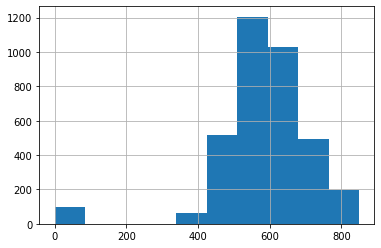

In [11]:
# note that this is the distribution of all subjects'/all trials' RTs
#plt.hist(df['rt']);
df['rt'].hist();

In [12]:
df['rt'].min()

0

In [13]:
df['rt'].value_counts()[:9]

0      98
551    25
591    24
592    22
583    21
593    21
573    20
569    20
602    20
Name: rt, dtype: int64

### So it looks like we have some RTs of zero.  We ask our student/collaborator and are told these are 'non-reponses' (too slow).

In [14]:
# let's eliminate trials where rt == 0
df.drop(df[df.rt == 0].index, inplace=True)

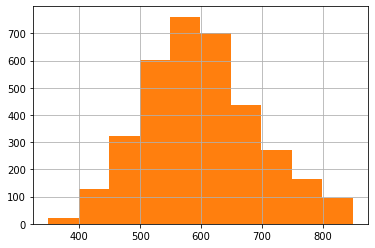

In [15]:
#plt.hist(df['rt']);
df['rt'].hist();

Much better!

In [16]:
# if we wanted to drop fast and slow RTs, we could do something like this
df = df.drop(df[ (df.rt == 0) | (df.rt > 1500) ].index)

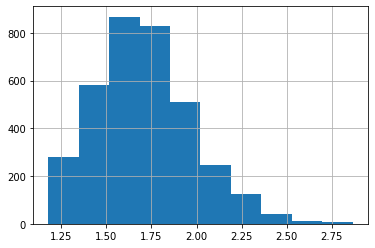

In [17]:
# transform RT and place in a new column
df['rate'] = 1000.0/df['rt']
#df['rate'] = np.log(df['rt'])
#plt.hist(df['rate']);
df['rate'].hist();

In [18]:
sub_means = df[['subject','correct', 'rt']].groupby('subject').mean()

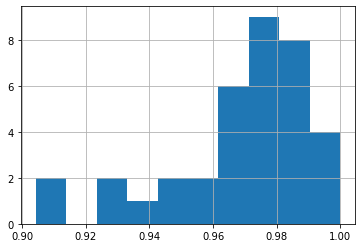

In [19]:
#plt.hist(sub_means['correct']);
sub_means['correct'].hist();

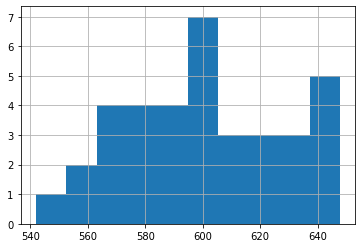

In [20]:
#plt.hist(sub_means['rt']);
sub_means['rt'].hist();

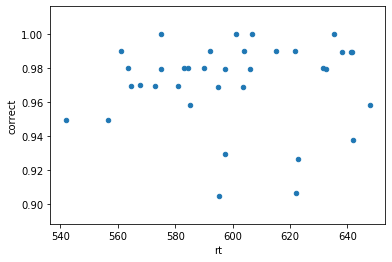

In [21]:
#plt.plot(sub_means['rt'], sub_means['correct'], 'bo')
#plt.xlabel('rt')
#plt.ylabel('p(correct)');
sub_means.plot.scatter(x='rt', y='correct');

## Save wrangled data

In [22]:
df.to_csv('./shooter-data/shooter-group.csv', index=False)

## Visualize

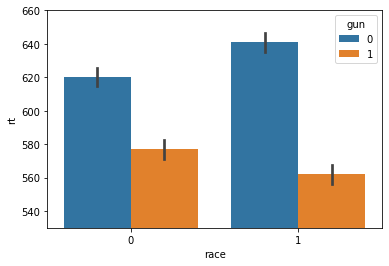

In [23]:
sns.barplot(x='race', y='rt', hue='gun', data=df)
plt.ylim(530, 660);

(0.94, 1)

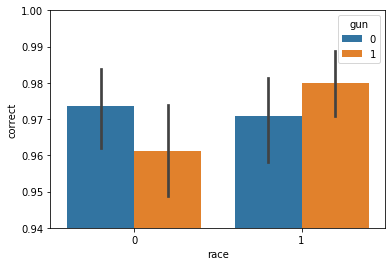

In [24]:
sns.barplot(x='race', y='correct', hue='gun', data=df)
plt.ylim(.94, 1)